In [422]:
import sys
sys.path.append('../')

import pickle

folder = '/local/scratch_2/jls/virac_classifier/variable/edr3_SJ_noalias/'
with open(folder+'variable_classifier_0.pkl', 'rb') as f:
    var = pickle.load(f)
with open(folder+'variable_training_set_0.pkl', 'rb') as f:
    var_dataset_scaled = pickle.load(f)
with open(folder+'variable_features_total.pkl', 'rb') as f:
    var_dataset_full = pickle.load(f)
with open(folder+'variable_features_mira.pkl', 'rb') as f:
    mira_features = pickle.load(f)
var_dataset_full = pd.concat([mira_features,var_dataset_full], axis=0, sort=False)
var_dataset_full = var_dataset_full[~var_dataset_full[['sourceid']].duplicated()].reset_index(drop=True)
var_dataset = var_dataset_full.merge(var_dataset_scaled[['sourceid', 'class', 'prob', 'prob_var']], on='sourceid',sort=False)
var_dataset = var_dataset[~var_dataset[['sourceid']].duplicated()].reset_index(drop=True)
var_dataset_full = var_dataset_full[(~var_dataset_full['error'])].reset_index(drop=True)

var_dataset_full.loc[var_dataset_full['var_class']=='MIRA','var_class']='LPV'
var_dataset_full.loc[var_dataset_full['var_class']=='SRV','var_class']='LPV'
var_dataset_full.loc[var_dataset_full['var_class']=='OSARG','var_class']='LPV'
var_dataset_full.loc[var_dataset_full['var_class']=='RRc','var_class']='RRcd'
var_dataset_full.loc[var_dataset_full['var_class']=='RRd','var_class']='RRcd'

var_dataset_lF = var_dataset_full[var_dataset_full['log10_fap_ls']<0].reset_index(drop=True)

var_dataset.loc[var_dataset['var_class']=='MIRA','var_class']='LPV'
var_dataset.loc[var_dataset['var_class']=='SRV','var_class']='LPV'
var_dataset.loc[var_dataset['var_class']=='OSARG','var_class']='LPV'
var_dataset.loc[var_dataset['var_class']=='RRc','var_class']='RRcd'
var_dataset.loc[var_dataset['var_class']=='RRd','var_class']='RRcd'

In [2]:
from itertools import product
def pplt(displ,figsize,
        include_values=True, cmap=plt.cm.Greys, 
                  ax=None, xticks_rotation='horizontal',
                  values_format=None,colorbar=False):
    fig, ax = plt.subplots(figsize=figsize)

    cm = displ.confusion_matrix
    n_classes = cm.shape[0]
    displ.im_ = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    displ.text_ = None

    cmap_min, cmap_max = displ.im_.cmap(0), displ.im_.cmap(256)

    if include_values:
        displ.text_ = np.empty_like(cm, dtype=object)
        if values_format is None:
            values_format = '.2g'

        # print text with appropriate color depending on background
        thresh = (cm.max() + cm.min()) / 2.0
        for i, j in product(range(n_classes), range(n_classes)):
            color = cmap_max if cm[i, j] < thresh else cmap_min
            displ.text_[i, j] = ax.text(j, i,
                                       format(cm[i, j], values_format),
                                       ha="center", va="center",
                                       color=color)

    if colorbar:
        fig.colorbar(displ.im_, ax=ax)
    ax.set(xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=displ.display_labels,
           yticklabels=displ.display_labels,
           ylabel="True label",
           xlabel="Predicted label")

    ax.set_ylim((n_classes - 0.5, -0.5))
    plt.setp(ax.get_xticklabels(), rotation=xticks_rotation)

    displ.figure_ = fig
    displ.ax_ = ax
    return displ

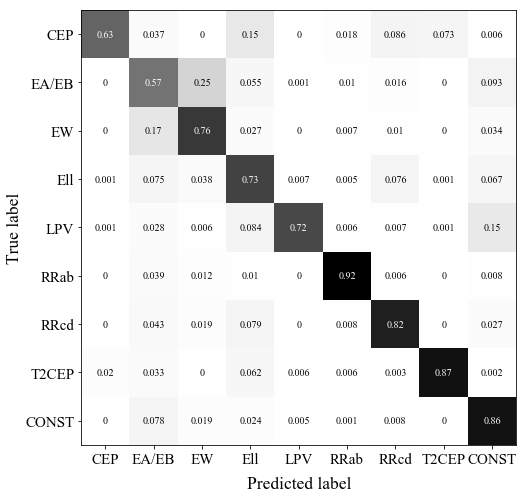

In [3]:
from initial_classif.classifier.classifier import ConfusionMatrixDisplay
CM = np.around(var.cm/np.nansum(var.cm,axis=1)[:,np.newaxis], decimals=3)
cp=np.vstack([CM[0],CM[2:],CM[1]])
cp=np.vstack([cp.T[0],cp.T[2:],cp.T[1]]).T           
               
displ = ConfusionMatrixDisplay(
    confusion_matrix=cp,
        display_labels=['CEP', 'EA/EB', 'EW', 'Ell', 'LPV', 'RRab', 'RRcd', 'T2CEP',
                       'CONST'])
# disp = displ.plot(include_values=True, cmap=plt.cm.Blues, 
#                   ax=None, xticks_rotation='horizontal',
#                   values_format=None,colorbar=False)

displ=pplt(displ,figsize=[8,8])
fig = displ.figure_
ax = displ.ax_
im = displ.im_
fig.set_size_inches(8,8)
ax.set_xlabel('Predicted label',family='serif', fontsize=17.5, labelpad=10)
ax.set_ylabel('True label',family='serif', fontsize=17.5, labelpad=2)
#ax.tick_params(labelsize=15)
import matplotlib
ticks_font = matplotlib.font_manager.FontProperties(family='serif',
                                                            style='normal', size=15,
                                                            weight='normal', stretch='normal')
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
    
# plt.savefig('confusion_matrix.pdf',bbox_inches='tight')

In [5]:
ft=[]
vd=[]
for ii in var.feature_importance.keys():
    if ii[-2:]=='_x':
        ft+=[ii[:-2]]
        vd+=['%0.3f'%np.sqrt(var.feature_importance[ii]*var.feature_importance[ii[:-2]+'_y'])]
    elif ii[-2:]=='_y':
        continue
    else:
        ft+=[ii]
        vd+=['%0.3f'%var.feature_importance[ii]]
asd = np.argsort(np.array(vd))[::-1]
for ii in range(len(vd)):
    print(np.array(ft)[asd][ii],np.array(vd)[asd][ii])

lsq_period 0.078
amp_double_1 0.055
amplitude 0.050
log10_fap 0.045
JK_col 0.045
model_amplitude 0.041
amp_0 0.038
ks_mad 0.037
ks_p95_p5 0.034
pow_mean_disp 0.029
max_pow 0.026
ks_mad_over_error 0.025
ks_p84_p16 0.024
normed_delta_loglik 0.021
amp_double_3 0.021
a1_a3_double 0.016
ks_p75_p25_over_error 0.014
phi1_phi0 0.012
HK_col 0.012
a0_a2 0.011
a0_a1 0.011
ks_stetson_i 0.011
ks_stetson_j 0.010
peak_ratio_model 0.010
ks_stdev 0.009
ks_p99_p1_over_error 0.009
amp_1 0.008
ks_p84_p16_over_error 0.008
a0_a1_double 0.008
a0_a3_double 0.008
ks_p100_p0_over_error 0.007
Z_model 0.007
ks_stdev_over_error 0.007
ks_p99_p1 0.007
ks_p75_p25 0.007
phi2_phi0 0.007
ks_p95_p5_over_error 0.007
J_model 0.007
Y_scale 0.006
phi3_phi1_double 0.006
ks_eta 0.006
a1_a2_double 0.006
amp_double_2 0.005
max_phase_lag 0.005
a0_a3 0.005
amp_double_0 0.005
beyondfrac 0.005
ks_kurtosis 0.005
ks_p100_p0 0.005
Y_model 0.005
Z_scale 0.005
J_scale 0.005
amp_2 0.005
phi2_phi1 0.005
amp_3 0.005
phi1_phi0_double 0.004
H

In [403]:
def period_fix(var_in,tol=1.):

    period_out = var_in['lsq_period'].values.copy()

    period_out[((var_in['var_class']=='EA/EB')|(var_in['var_class']=='Ell'))&
                (var_in['amp_0']>tol*var_in['amp_1'])]*=2.
    
    ss=np.argmax([var_in['amp_0'].values,
                  var_in['amp_1'].values,
                  var_in['amp_2'].values,
                  var_in['amp_3'].values],axis=0)
    fltr = ~((var_in['var_class']=='EA/EB')|(var_in['var_class']=='Ell'))
    period_out[fltr]/=(1.+ss)[fltr]
    
    period_out[var_in['var_class']=='EW']*=2
    
    return period_out
    

In [404]:
def add_day_alias_lines_G(centre=np.log10(80.),centre2=np.log10(72.),
                     year_alias_label=False):
    print(year_alias_label)
    xx = np.log10(np.logspace(np.log10(0.001), np.log10(3000.),10000))
    plt.plot(xx, xx, color='gray')
    
    for ii in [1. / 2., 2.]:
        plt.plot(xx, np.log10(ii) + xx, color='k', alpha=0.2, ls='dashed')
        
    xxT, yy = xx.copy(), np.log10(1. / (1. / np.power(10.,xx) + 1. / 1.))
    plt.plot(xxT, yy, color='r', alpha=0.2, ls='dashed')
    xxT, yy = xx.copy(), np.log10(1. / (1. / np.power(10.,xx) - 1. / 1.))
    plt.plot(xxT, yy, color='r', alpha=0.2, ls='dashed')
    
    plt.annotate('1:2',
                 xy=(centre + np.log10(2.), centre),
                 fontsize=12.,
                 rotation=45.,
                 xycoords='data',
                 alpha=0.5)
    
    plt.annotate('2:1',
                 xy=(centre2, centre2 + np.log10(2.)),
                 fontsize=12.,
                 rotation=45.,
                 xycoords='data',
                 alpha=0.5)
    
    if year_alias_label:
        plt.annotate('day alias',
                     xy=(np.log10(.3), np.log10(1. / (1. / .3 + 1. / 1.) + .12)),
                     fontsize=12.,
                     rotation=35.,
                     xycoords='data',
                     alpha=0.5,
                     color='r')
        plt.annotate('day alias',
                     xy=(np.log10(.3), np.log10(1. / (1. / .3 - 1. / 1.) + .12)),
                     fontsize=12.,
                     rotation=52.,
                     xycoords='data',
                     alpha=0.5,
                     color='r')

In [405]:
def add_double_lines(centre,centre2):
    
    xx = np.log10(np.logspace(np.log10(0.001), np.log10(3000.),10000))
    plt.plot(xx, xx, color='gray')
    
    for ii in [1. / 2., 2.]:
        plt.plot(xx, np.log10(ii) + xx, color='k', alpha=0.2, ls='dashed')
        
    plt.annotate('1:2',
                 xy=(centre + np.log10(2.), centre),
                 fontsize=12.,
                 rotation=45.,
                 xycoords='data',
                 alpha=0.5)
    
    plt.annotate('2:1',
                 xy=(centre2, centre2 + np.log10(2.)),
                 fontsize=12.,
                 rotation=45.,
                 xycoords='data',
                 alpha=0.5)

def add_year_alias_red():

    xx = np.log10(np.logspace(np.log10(0.001), np.log10(3000.),10000))
    
    xxT, yy = xx.copy(), np.log10(1. / (1. / np.power(10.,xx) - 1. / 365))
    plt.plot(xxT, yy, color='r', alpha=0.2, ls='dashed')
    xxT, yy = xx.copy(), np.log10(1. / (1. / np.power(10.,xx) + 1. / 365))
    plt.plot(xxT, yy, color='r', alpha=0.2, ls='dashed')
    
def add_day_alias_red():
    
    xx = np.log10(np.logspace(np.log10(0.001), np.log10(3000.),10000))
    xxT, yy = xx.copy(), np.log10(1. / (1. / np.power(10.,xx) + 1. / 1.))
    plt.plot(xxT, yy, color='r', alpha=0.2, ls='dashed')
    xxT, yy = xx.copy(), np.log10(1. / (1. / np.power(10.,xx) - 1. / 1.))
    plt.plot(xxT, yy, color='r', alpha=0.2, ls='dashed')
    
        
def add_half_day_alias_red():
    
    xx = np.log10(np.logspace(np.log10(0.001), np.log10(3000.),10000))
    xxT, yy = xx.copy(), np.log10(1. / (1. / np.power(10.,xx) + 1. / 2.))
    plt.plot(xxT, yy, color='r', alpha=0.2, ls='dashed')
    xxT, yy = xx.copy(), np.log10(1. / (1. / np.power(10.,xx) - 1. / 2.))
    plt.plot(xxT, yy, color='r', alpha=0.2, ls='dashed')

In [406]:
def add_day_G():
    plt.axhline(np.log10(1.), ls='dashed', zorder=-60, alpha=0.3)
    plt.axhline(np.log10(1. / 2.), ls='dashed', zorder=-60, alpha=0.3)
    plt.axhline(np.log10(1. / 3.), ls='dashed', zorder=-60, alpha=0.3)
    plt.axhline(np.log10(1. / 4.), ls='dashed', zorder=-60, alpha=0.3)
    plt.axhline(np.log10(1. / 5.), ls='dashed', zorder=-60, alpha=0.3)
    plt.axvline(np.log10(1.), ls='dashed', zorder=-60, alpha=0.3)
    plt.axvline(np.log10(1. / 2.), ls='dashed', zorder=-60, alpha=0.3)
    plt.axvline(np.log10(1. / 3.), ls='dashed', zorder=-60, alpha=0.3)
    plt.axvline(np.log10(1. / 4.), ls='dashed', zorder=-60, alpha=0.3)
    plt.axvline(np.log10(1. / 5.), ls='dashed', zorder=-60, alpha=0.3)

In [407]:
def add_vline(x):
    plt.axvline(np.log10(x), ls='dashed', zorder=-60, alpha=0.3)
def add_hline(x):
    plt.axhline(np.log10(x), ls='dashed', zorder=-60, alpha=0.3)

def add_annotate(l,x,y):
    plt.annotate(
        l,
        xy=(np.log10(x), np.log10(y)),
        xycoords='data',
        ha='right',
        va='bottom',
        fontsize=12.,
        color=sns.color_palette()[0],
    )
    plt.annotate(l,
                 xy=(np.log10(y), np.log10(x)),
                 xycoords='data',
                 ha='right',
                 va='top',
                 fontsize=12.,
                 color=sns.color_palette()[0],
                 rotation=90)
    
def add_year_G(year_labels=False):
    
    [add_hline(365./ii) for ii in range(1,5)]
    [add_vline(365./ii) for ii in range(1,5)]
    
    add_annotate('1 year', 980., 365.)
    
    for ii in range(2, 5):
        add_annotate('1/%i year' % ii, 980., 365./ii)

In [408]:
from matplotlib.ticker import ScalarFormatter, LogLocator
from matplotlib.colors import PowerNorm
import sys
import seaborn as sns
sys.path.append('../../../')
from lc_utils import add_alias_lines, add_year_grid
from matplotlib.colors import PowerNorm

def make_one_to_one_plot(var_dataset,literature='Matsunaga et al. (2009)',with_ylabels=True,
                        xlim=[0.1,1000],bins=50,points=True,
                        ticks=np.array([0.1,0.2,0.5,1,2,5,10,20,100,200,500,1000]),
                        year_alias_label=False,
                        year_labels=False):
    f,a=plt.subplots(2,1,figsize=[5.6*5.5/7.,7.*5.5/7.],
                     gridspec_kw={'height_ratios':[1.,0.2]})

    
    plt.subplots_adjust(hspace=0.02,wspace=0.02)
    plt.sca(a[0])
    xx = np.linspace(0.,3000.)
    if not points:
        plt.hist2d(var_dataset['cat_period'],
                   period_fix(var_dataset),
                   bins=[np.logspace(np.log10(xlim[0]),np.log10(xlim[1]),bins),
                         np.logspace(np.log10(xlim[0]),np.log10(xlim[1]),bins)],
                   range=[xlim,xlim],
                   cmap=plt.cm.Greys,
                   norm=LogNorm(),
                   zorder=50
                  )
    else:
        from scipy.stats import gaussian_kde
        xy = np.vstack([np.log(period_fix(var_dataset))/0.05,
                   (var_dataset['cat_period']/period_fix(var_dataset)-1)/0.001])
        z = np.log10(gaussian_kde(xy,bw_method=0.01)(xy))
        idx = z.argsort()
        plt.scatter(np.log10(var_dataset['cat_period'].values[idx]),
                   np.log10(period_fix(var_dataset)[idx]),c=z[idx],zorder=50,
                   s=100./np.sqrt(len(var_dataset)),
                   cmap=plt.cm.inferno,vmax=np.max(z)*0.95,rasterized=True)
        
    plt.xlim(*np.log10(xlim))
    plt.ylim(*np.log10(xlim))
    plt.gca().set_xticklabels([])
    plt.gca().set_aspect('equal')
    if with_ylabels:
        plt.ylabel('VVV period [day]')
    else:
        plt.gca().set_yticklabels([])
        
    plt.title(literature,fontsize=16)
        
    plt.sca(a[1])
    
    cmap = plt.cm.Greys
    cmap.set_under(alpha=0.)
    if not points:
        plt.hist2d(var_dataset['cat_period'],
                   (var_dataset['lsq_period']/var_dataset['cat_period']-1)*100.,
                   bins=[np.logspace(np.log10(xlim[0]),np.log10(xlim[1]),bins),
                         np.linspace(-120,120,bins)],
                   range=[xlim,xlim],
                   cmap=cmap,
                   norm=LogNorm(),
                   zorder=50,
                   vmin=2
                  )
    else:
        plt.scatter(np.log10(var_dataset['cat_period'].values[idx]),
                 ((period_fix(var_dataset)/var_dataset['cat_period']-1)*100).values[idx],
                    c=z[idx],zorder=50,
               s=100./np.sqrt(len(var_dataset)),
               cmap=plt.cm.inferno,vmax=np.max(z)*0.95,rasterized=True)
    
    plt.xlabel('Literature period [day]')
    plt.ylim(-120.,120.)
    plt.xlim(*np.log10(np.array(xlim)))
#     plt.semilogx()
    
    plt.gca().xaxis.set_major_locator(LogLocator(subs=(0.5,1.,2.)))
    plt.gca().xaxis.set_major_formatter(ScalarFormatter())
    if with_ylabels:
        plt.ylabel('% diff.')
    plt.axhline(0.,alpha=0.3,color='k',ls='dashed',zorder=-2)
    a[0].set_xticklabels([])
    plt.sca(a[0])
    def fmtt(t):
        if t<2.:
            return '%0.1f'%t
        else:
            return '%i'%t
    
    plt.yticks(np.log10(ticks)[(ticks>xlim[0])&(ticks<=xlim[1])],
               [fmtt(t) for t in ticks[(ticks>xlim[0])&(ticks<=xlim[1])]]);
    plt.sca(a[1])
    plt.xticks(np.log10(ticks)[(ticks>xlim[0])&(ticks<=xlim[1])],
               [fmtt(t) for t in ticks[(ticks>xlim[0])&(ticks<=xlim[1])]]);
    if not with_ylabels:
        a[0].set_yticklabels([])
        a[1].set_yticklabels([])
    return a

/data/jls/python3.5/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in log10


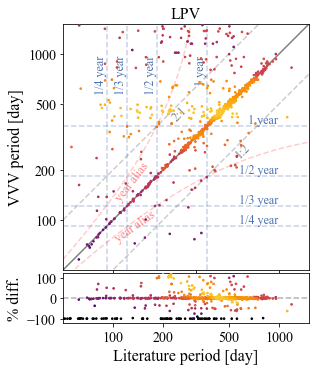

In [414]:
ax=make_one_to_one_plot(var_dataset_lF[(var_dataset_lF['var_class']=='LPV')&(var_dataset_lF['cat_period']>0.)],
                    xlim=[50.,1500.1],bins=60,literature='LPV',points=True,
                    year_alias_label=True)
plt.sca(ax[0]);
add_year_alias_red();
add_year_G();
# add_alias_lines_G();
add_double_lines(np.log10(265.),np.log10(220.))
plt.annotate('year alias',
             xy=(np.log10(100.), np.log10(1. / (1. / 100. + 1. / 365.) + 25.)),
             fontsize=12.,
             rotation=35.,
             xycoords='data',
             alpha=0.5,
             color='r')
plt.annotate('year alias',
             xy=(np.log10(100.), np.log10(1. / (1. / 100. - 1. / 365.) + 65.)),
             fontsize=12.,
             rotation=52.,
             xycoords='data',
             alpha=0.5,
             color='r')

plt.savefig('period_1to1_lpv.pdf',bbox_inches='tight',dpi=300)

/data/jls/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in log10


Text(-0.1870866433571444, 0.7781512503836436, 'day alias')

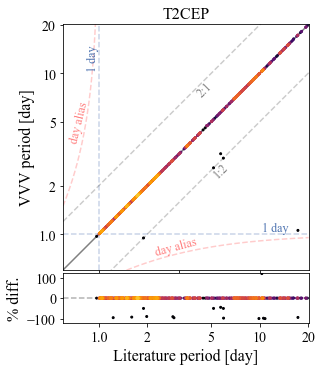

In [418]:
ax=make_one_to_one_plot(var_dataset_lF[(var_dataset_lF['var_class']=='T2CEP')],
                    xlim=[0.6,20.1],bins=100,literature='T2CEP',
                    points=True)
plt.sca(ax[0]);#add_alias_lines_G()
add_double_lines(np.log10(2.5),np.log10(4.))
add_day_alias_red()
add_hline(1.)
add_vline(1.)
add_annotate('1 day', 15., 1.)
plt.annotate('day alias',
             xy=(np.log10(2.2), np.log10(1. / (1. / .5 + 1. / 1.) + .53)),
             fontsize=12.,
             rotation=15.,
             xycoords='data',
             alpha=0.5,
             color='r')
plt.annotate('day alias',
             xy=(np.log10(0.65), np.log10(1. / (1. / .5 - 1. / 1.) + 5.)),
             fontsize=12.,
             rotation=76.,
             xycoords='data',
             alpha=0.5,
             color='r')

# plt.savefig('period_1to1_t2cep.pdf',bbox_inches='tight',dpi=300)

/data/jls/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log10
/data/jls/python3.5/site-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
/data/jls/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in log10


Text(-0.3979400086720376, 0.3424226808222063, 'day alias')

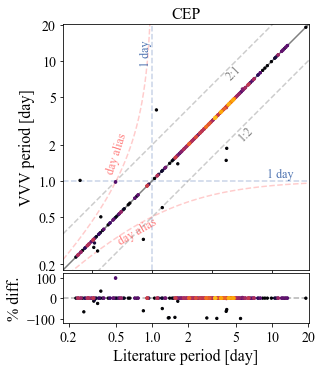

In [416]:
ax=make_one_to_one_plot(var_dataset_lF[(var_dataset_lF['var_class']=='CEP')],
                    xlim=[0.18,20.1],bins=100,literature='CEP',
                    points=True)
plt.sca(ax[0]);#add_alias_lines_G()
add_double_lines(np.log10(2.5),np.log10(4.))
add_day_alias_red()
add_hline(1.)
add_vline(1.)
add_annotate('1 day', 15., 1.)
plt.annotate('day alias',
             xy=(np.log10(.5), np.log10(1. / (1. / .5 + 1. / 1.) + .1)),
             fontsize=12.,
             rotation=30.,
             xycoords='data',
             alpha=0.5,
             color='r')
plt.annotate('day alias',
             xy=(np.log10(.4), np.log10(1. / (1. / .5 - 1. / 1.) + 1.2)),
             fontsize=12.,
             rotation=72.,
             xycoords='data',
             alpha=0.5,
             color='r')

# plt.savefig('period_1to1_cep.pdf',bbox_inches='tight',dpi=300)

/data/jls/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in log10
/data/jls/python3.5/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in log10


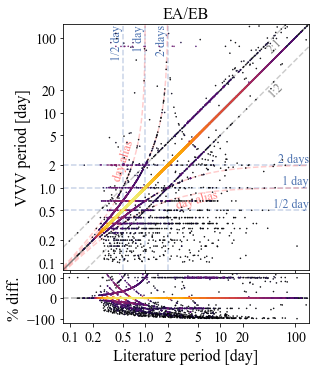

In [105]:
ax=make_one_to_one_plot(var_dataset_lF[var_dataset_lF['var_class']=='EA/EB'],
                    xlim=[0.08,150.1],bins=200,literature='EA/EB',
                    points=True)
plt.sca(ax[0])
add_double_lines(np.log10(20.5),np.log10(40.))
add_day_alias_red()
add_hline(1.)
add_vline(1.)
add_annotate('1 day', 150., 1.)

add_hline(.5)
add_vline(.5)
add_annotate('1/2 day', 150., .5)

add_hline(2.)
add_vline(2.)
add_annotate('2 days', 150., 2.)

plt.annotate('day alias',
             xy=(np.log10(2.5), np.log10(1. / (1. / .5 + 1. / 1.) + .4)),
             fontsize=12.,
             rotation=15.,
             xycoords='data',
             alpha=0.5,
             color='r')
plt.annotate('day alias',
             xy=(np.log10(.35), np.log10(1. / (1. / .5 - 1. / 1.) + 2.5)),
             fontsize=12.,
             rotation=72.,
             xycoords='data',
             alpha=0.5,
             color='r')
add_half_day_alias_red()
# plt.savefig('period_1to1_eaeb.pdf',bbox_inches='tight',dpi=300)

/data/jls/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in log10
/data/jls/python3.5/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in log10


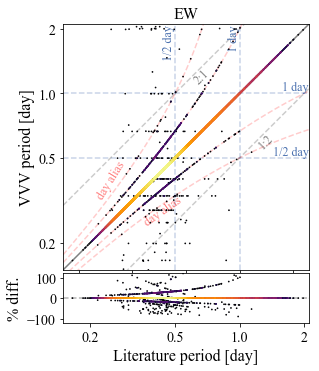

In [106]:
ax=make_one_to_one_plot(var_dataset_lF[var_dataset_lF['var_class']=='EW'],
                    xlim=[0.15,2.1],bins=100,literature='EW',
                    points=True)

plt.sca(ax[0])
add_double_lines(np.log10(0.6),np.log10(0.6))
add_day_alias_red()
add_hline(1.)
add_vline(1.)
add_annotate('1 day', 2.1, 1.)

add_hline(.5)
add_vline(.5)
add_annotate('1/2 day', 2.1, .5)

add_half_day_alias_red()

plt.annotate('day alias',
             xy=(np.log10(0.35), np.log10(1. / (1. / .5 + 1. / 1.) -0.025)),
             fontsize=12.,
             rotation=35.,
             xycoords='data',
             alpha=0.5,
             color='r')
plt.annotate('day alias',
             xy=(np.log10(.21), np.log10(1. / (1. / .5 - 1. / 1.) -0.55)),
             fontsize=12.,
             rotation=58.,
             xycoords='data',
             alpha=0.5,
             color='r')
# plt.savefig('period_1to1_ew.pdf',bbox_inches='tight',dpi=300)

/data/jls/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in log10
/data/jls/python3.5/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in log10


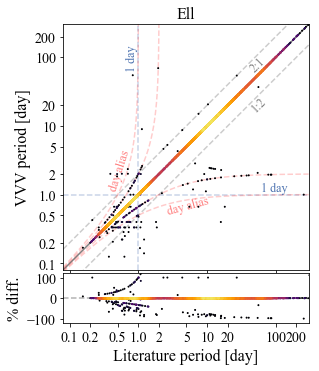

In [107]:
ax=make_one_to_one_plot(var_dataset_lF[var_dataset_lF['var_class']=='Ell'],
                    xlim=[0.08,300.1],bins=100,literature='Ell',
                    points=True)
plt.sca(ax[0])
add_double_lines(np.log10(20.5),np.log10(40.))
add_day_alias_red()
add_hline(1.)
add_vline(1.)
add_annotate('1 day', 150., 1.)

add_half_day_alias_red()

plt.annotate('day alias',
             xy=(np.log10(2.5), np.log10(1. / (1. / .5 + 1. / 1.) + .4)),
             fontsize=12.,
             rotation=15.,
             xycoords='data',
             alpha=0.5,
             color='r')
plt.annotate('day alias',
             xy=(np.log10(.35), np.log10(1. / (1. / .5 - 1. / 1.) + 2.5)),
             fontsize=12.,
             rotation=72.,
             xycoords='data',
             alpha=0.5,
             color='r')

# plt.savefig('period_1to1_ell.pdf',bbox_inches='tight',dpi=300)

/data/jls/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in log10


Text(-0.5228787452803376, -0.1739251972991736, 'day alias')

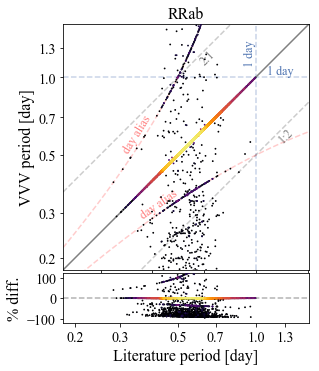

In [18]:
ax=make_one_to_one_plot(var_dataset_lF[var_dataset_lF['var_class']=='RRab'],
                    xlim=[0.18,1.6],bins=100,literature='RRab',points=True,
                    ticks=np.array([0.2,0.3,0.5,0.7,1.,1.3]))
plt.sca(ax[0])
add_double_lines(np.log10(0.6),np.log10(0.6))
add_day_alias_red()
add_hline(1.)
add_vline(1.)
add_annotate('1 day', 1.4, 1.)
plt.annotate('day alias',
             xy=(np.log10(0.35), np.log10(1. / (1. / .5 + 1. / 1.) + 0.015)),
             fontsize=12.,
             rotation=35.,
             xycoords='data',
             alpha=0.5,
             color='r')
plt.annotate('day alias',
             xy=(np.log10(.3), np.log10(1. / (1. / .5 - 1. / 1.) -0.33)),
             fontsize=12.,
             rotation=58.,
             xycoords='data',
             alpha=0.5,
             color='r')

# plt.savefig('period_1to1_rrab.pdf',bbox_inches='tight',dpi=300)

/data/jls/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in log10


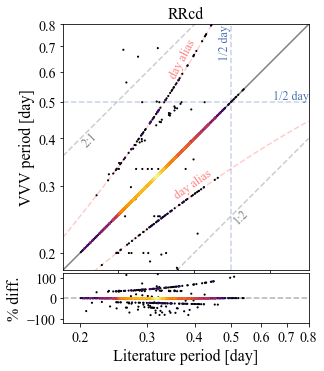

In [109]:
ax=make_one_to_one_plot(var_dataset_lF[var_dataset_lF['var_class']=='RRcd'],
                    xlim=[0.18,0.8],bins=100,literature='RRcd',points=True,
                    ticks=np.array([0.2,0.3,0.4,0.5,0.6,0.7,0.8]))
plt.sca(ax[0])
add_double_lines(np.log10(0.25),np.log10(0.2))
add_day_alias_red()
add_hline(.5)
add_vline(.5)
add_annotate('1/2 day', 0.8, .5)
plt.annotate('day alias',
             xy=(np.log10(0.35), np.log10(1. / (1. / .5 + 1. / 1.) -0.015)),
             fontsize=12.,
             rotation=35.,
             xycoords='data',
             alpha=0.5,
             color='r')
plt.annotate('day alias',
             xy=(np.log10(.34), np.log10(1. / (1. / .5 - 1. / 1.) -0.3)),
             fontsize=12.,
             rotation=62.,
             xycoords='data',
             alpha=0.5,
             color='r')

# plt.savefig('period_1to1_rrcd.pdf',bbox_inches='tight',dpi=300)

In [7]:
import sys
sys.path.append('../')
from config import configuration
config = configuration()
config.request_password()

def get_lightcurve(sourceid):

    lcs = pd.DataFrame(sqlutilpy.get('''
                                select sourceid, 
                                unnest(mjdobs) as mjdobs,
                                unnest(mag) as mag,
                                unnest(emag) as emag,
                                unnest(filterid) as filterid,
                                unnest(chi) as chi,
                                unnest(ast_res_chisq) as ast_res_chisq,
                                unnest(ambiguous_match) as ambiguous_match  
                                from leigh_smith.virac2_ts_tmolnar_train_zyjhk where sourceid={0}'''.format(sourceid),
                     **config.wsdb_kwargs))
    
    if len(lcs)==0:

        lcs = pd.DataFrame(sqlutilpy.get('''
                                    select sourceid, 
                                    unnest(mjdobs) as mjdobs,
                                    unnest(mag) as mag,
                                    unnest(emag) as emag,
                                    unnest(filterid) as filterid,
                                    unnest(chi) as chi,
                                    unnest(ast_res_chisq) as ast_res_chisq,
                                    unnest(ambiguous_match) as ambiguous_match  
                                    from leigh_smith.virac2_ts_tmolnar_variables where sourceid={0}'''.format(sourceid),
                         **config.wsdb_kwargs))
    
    return lcs


 ·············


In [2]:
import sys
import sqlutilpy
sys.path.append('../')
from fine_classif.feat_extract.compute_feats import correct_to_HJD, fourier_poly_chi2_fit_full, \
    retrieve_fourier_poly, LombScargle
from fine_classif.feat_extract.compute_feats import sigclipper, \
optimum_regularization, check_significant_second_minimum, find_phase_of_minimum

In [3]:
def plot_lightcurve(clss='RRab',ii=105,ax=None,reg=True):
    fltr = (var_dataset['class']==clss)&(var_dataset['prob']>0.9)&(var_dataset['ks_b_ivw_mean_mag']<14.)
    sid,per,clss=var_dataset['sourceid'].values[fltr][ii],period_fix(var_dataset)[fltr][ii],var_dataset['class'].values[fltr][ii]
    cper = var_dataset['cat_period'].values[fltr][ii]
    prb = var_dataset['prob'].values[fltr][ii]
    print(var_dataset['var_class'].values[fltr][ii])
    print('LSQ period', var_dataset['lsq_period'].values[fltr][ii])
    print(var_dataset['significant_second_minimum'].values[fltr][ii])
    print('corrected LSQ period', period_fix(var_dataset)[fltr][ii])
    print(sid)
    print('Cat period', cper)
    results_d, lc=plot_lc_sid(sid, var_dataset['ra'].values[ii], var_dataset['dec'].values[ii],per,
                var_dataset['lsq_nterms'].values[ii], cper, ax=ax, reg=reg)
    plt.title('%s, classif. prob.=%0.4f'%(clss,prb),loc='left',fontsize=18)
    return results_d, lc
    
def plot_lc_sid(sid,ra,dec,per,nterms,cper,ax=None,reg=True):
    lc=get_lightcurve(sid)
    clean = (lc['filterid']==5)&(lc['ambiguous_match']==0)&(lc['ast_res_chisq']<13.)&(lc['chi']<5.)
    lc = sigclipper(lc[clean])

    correct_to_HJD(lc,
                 ra,
                 dec)

    tt = lc['HJD'].values[np.argmin(np.abs(lc['mag'].values-np.nanpercentile(lc['mag'],98.)))]

    model = LombScargle(lc['HJD'].values-tt, lc['mag'].values, 
                        lc['emag'].values, normalization='standard')
    freq, power = model.autopower(maximum_frequency=10.)

    if ax is None:
        f,ax=plt.subplots(2,1,figsize=[5.,5.5],gridspec_kw={'height_ratios':[1.,0.3]})
    plt.sca(ax[0])
    plt.errorbar((((lc['HJD'].values-tt)%(2.*per))/per),
                 lc['mag'].values,
                 yerr=lc['emag'].values,fmt='o',color='gray',mew=0.5,mec='k')
#     plt.ylim(np.nanmean(lc['mag'].values)-0.3,np.nanmean(lc['mag'].values)+0.3)
    plt.gca().invert_yaxis()
    plt.xlim(-0.1,2.1)
    # plt.ylim(-0.5,0.5)
    plt.xlabel('Phase')
    plt.ylabel(r'$K_s$ [mag]')
#     nterms=combo_dset['lsq_nterms'].values[fltr][ii]
    opt_reg=0
    if reg:
        opt_reg=optimum_regularization(lc['mag'].values, lc['emag'].values)
    print(opt_reg)
    results_d = fourier_poly_chi2_fit_full(
                                             times=lc['HJD'].values-tt,
                                             mag=lc['mag'].values,
                                             err=lc['emag'].values,
                                             freq_dict={'freq_grid':np.array([1./per])},
                                             nterms=np.int64(nterms),
                                             npoly=3,
                                             regularization=opt_reg,
                                             time_zeropoint_poly=0.,
                                             regularize_by_trace = True,
                                             check_multiples=False, 
                                             use_power_of_2=False,
                                             return_period_error=False)
    print(find_phase_of_minimum(results_d))
    print(check_significant_second_minimum(results_d, 
                                          find_phase_of_minimum(results_d)))
    
    xx=np.linspace(-0.1*per,2.1*per,1000)
    FF = retrieve_fourier_poly(xx,
                               results_d)
    plt.plot(xx/per, FF,color='#FFA500',lw=3)

    plt.sca(ax[1])
    plt.plot(1./freq,power,color='#FFA500',lw=0.6)
    plt.xlim(np.max([per*0.2,0.1]),per*5.)
    plt.semilogx()

    plt.gca().xaxis.set_major_locator(LogLocator(subs=(0.5,1.,2.)))
    plt.gca().xaxis.set_major_formatter(ScalarFormatter())

    plt.axvline(per,color='gray',ls='dashed',alpha=0.5,lw=3,zorder=-10)
    plt.axvline(per/2.,color='gray',ls='dashed',alpha=0.2,lw=3,zorder=-10)

    plt.annotate('Period=%0.4f days'%per,xy=(0.98,0.95),ha='right',va='top',xycoords='axes fraction',
                fontsize=15)
    
    plt.xlabel('Period [days]')
    plt.ylabel('LS Power')
    plt.ylim(0.,)
    plt.subplots_adjust(hspace=0.32)
    plt.sca(ax[0])
    
#     plt.figure()
#     plt.errorbar((((lc['HJD'].values-tt))),
#                  lc['mag'].values,
#                  yerr=lc['emag'].values,fmt='o',color='gray',mew=0.5,mec='k')
#     plt.gca().invert_yaxis()
#     plt.xlabel('Phase')
#     plt.ylabel(r'$K_s$ [mag]')
#     xx = np.linspace(*np.nanpercentile(lc['HJD'].values-tt,[0.,100.]),1000)
#     FF = retrieve_fourier_poly(xx,
#                                results_d)
#     plt.plot(xx, FF,color='#FFA500',lw=3)
    
#     plt.figure()
#     plt.errorbar((((lc['HJD'].values-tt) % (2.*cper))),
#                  lc['mag'].values,
#                  yerr=lc['emag'].values,fmt='o',color='gray',mew=0.5,mec='k')
#     plt.gca().invert_yaxis()
# #     plt.xlim(-0.1,2.1)
#     # plt.ylim(-0.5,0.5)
#     plt.xlabel('Phase')
#     plt.ylabel(r'$K_s$ [mag]')
#     opt_reg=0
#     if reg:
#         opt_reg=optimum_regularization(lc['mag'].values, lc['emag'].values)
#     print(opt_reg)
#     results_d = fourier_poly_chi2_fit_full(
#                                              times=lc['HJD'].values-tt,
#                                              mag=lc['mag'].values,
#                                              err=lc['emag'].values,
#                                              freq_dict={'freq_grid':np.array([1./cper])},
#                                              nterms=np.int64(nterms),
#                                              npoly=3,
#                                              regularization=opt_reg,
#                                              time_zeropoint_poly=0.,
#                                              regularize_by_trace = True,
#                                              check_multiples=False, 
#                                              use_power_of_2=False,
#                                              return_period_error=False)
    
#     xx=np.linspace(-0.1*cper,2.1*cper,1000)
# #     xx = np.linspace(*np.nanpercentile(lc['HJD'].values-tt,[0.,100.]),1000)
#     FF = retrieve_fourier_poly(xx,
#                                results_d)
#     plt.plot(xx, FF,color='#FFA500',lw=3)
    return results_d, lc
    # plt.plot((lc['mjdobs'][clean]%(cper)/cper),lc['mag'][clean]-np.nanmedian(lc['mag'][clean]),'.')

In [419]:
for ii in ['EW','EA/EB','RRab','RRcd','Ell','CEP','T2CEP','LPV']:
    fltr = (np.abs(var_dataset_lF['cat_period'].values/period_fix(var_dataset_lF)-1)>0.1)\
    &(var_dataset_lF['var_class']==ii)
    print(ii,'%0.2f'%(100*np.count_nonzero(fltr)/
                      np.count_nonzero((var_dataset_lF['var_class']==ii))))

/data/jls/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


EW 24.31
EA/EB 41.80
RRab 6.00
RRcd 24.32
Ell 25.46
CEP 6.04
T2CEP 2.68
LPV 63.83


In [420]:
for ii in ['EW','EA/EB','RRab','RRcd','Ell','CEP','T2CEP','LPV']:
    fltr = (np.abs(var_dataset['cat_period'].values/period_fix(var_dataset)-1)>0.1)\
    &(var_dataset['var_class']==ii)
    print(ii,'%0.2f'%(100*np.count_nonzero(fltr)/
                      np.count_nonzero((var_dataset['var_class']==ii))))

/data/jls/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


EW 24.37
EA/EB 41.84
RRab 5.98
RRcd 24.31
Ell 25.51
CEP 6.12
T2CEP 2.41
LPV 63.65


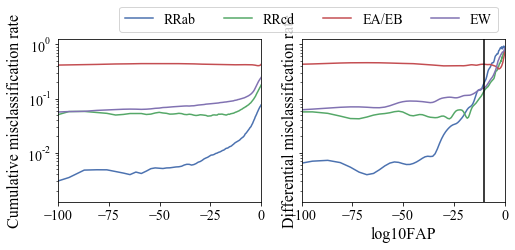

In [70]:
from scipy.ndimage import gaussian_filter1d

f,a=plt.subplots(1,2,figsize=[8.,3.],sharey=True,sharex=True)

for ii, kk in enumerate(['RRab','RRcd','EA/EB','EW']):
    bb = np.nanpercentile(var_dataset['log10_fap_ls'],np.linspace(0.,100.,150))
    n,b=np.histogram(var_dataset['log10_fap_ls'][(var_dataset['var_class']==kk)&~(var_dataset['class']==kk)],bins=bb)
    n2,b=np.histogram(var_dataset['log10_fap_ls'][(var_dataset['var_class']==kk)],bins=bb)
    plt.sca(a[0])
    plt.ylabel('Cumulative misclassification rate')
    plt.plot(.5*(b[1:]+b[:-1]),np.cumsum(n)/np.cumsum(n2),color=sns.color_palette(n_colors=8)[ii])
    plt.sca(a[1])
    plt.plot(.5*(b[1:]+b[:-1]),gaussian_filter1d(n/n2,2.),color=sns.color_palette(n_colors=8)[ii],
            label=kk)
    
plt.legend(ncol=4,bbox_to_anchor=(1.,1.),loc='lower right')
plt.semilogy()
plt.xlabel('log10FAP')
plt.ylabel('Differential misclassification rate')
plt.xlim(-100,0)
plt.axvline(-10,color='k')

In [73]:
var_dataset['phase_lag_mean']

0          3.904981
1          3.171314
2          4.550526
3          3.380096
4          4.502369
5          3.213642
6          3.164519
7          3.553331
8          4.111546
9          6.330552
            ...    
437098     6.167934
437099     6.183717
437100     9.171436
437101    10.584796
437102     9.623978
437103     8.700844
437104     9.220858
437105     5.664042
437106     9.700521
437107     7.527080
Name: phase_lag_mean, Length: 437108, dtype: float64

In [651]:
tt = pd.read_csv('/local/scratch_2/jls/virac_classifier/results/edr3_SJ_noalias/results_7380776_test.csv.tar.gz')
tt2 = pd.read_csv('../results_7380776_test.csv.tar.gz')

In [683]:
np.count_nonzero(tt['class']!='CONST'), np.count_nonzero(tt2['class']!='CONST')

(411, 530)

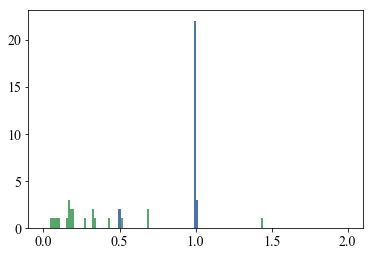

In [685]:
plt.hist(tt['lsq_period'][(tt['class']!='CONST')&(tt['prob']>0.6)],range=[0,2],bins=150);
plt.hist(tt2['lsq_period'][(tt2['class']!='CONST')&(tt2['prob']>0.6)],range=[0,2],bins=150);

In [669]:
tt[['sourceid','lsq_period']][(tt['class']!='CONST')&(tt['lsq_period']>0.995)&(tt['lsq_period']<1.005)&(tt['log10_fap']<-20)]

,sourceid,lsq_period
626,9274332019640,0.998198
648,9274332021325,0.996439
924,9274332046207,0.998062
1037,9274333004640,0.998022
1094,9274333014999,0.998944
1767,9278429033635,1.003445


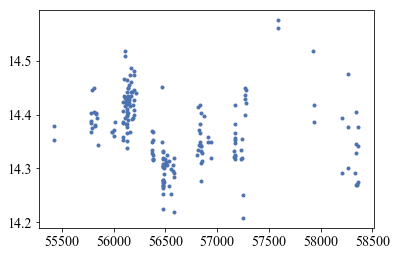

In [670]:
lc=get_lightcurve(9274333014999)
clean = (lc['filterid']==5)&(lc['ambiguous_match']==0)&(lc['ast_res_chisq']<13.)&(lc['chi']<5.)
lc = sigclipper(lc[clean])
plt.plot(lc['mjdobs'],lc['mag'],'.')

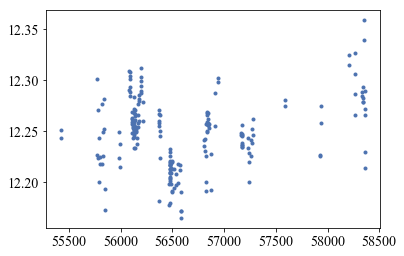

In [273]:
lc=get_lightcurve(9270237023277)
clean = (lc['filterid']==5)&(lc['ambiguous_match']==0)&(lc['ast_res_chisq']<13.)&(lc['chi']<5.)
lc = sigclipper(lc[clean])
plt.plot(lc['mjdobs'],lc['mag'],'.')

In [348]:
def grab_(ss):
    lc=get_lightcurve(ss)
    if(len(lc)==0):
        return
    clean = (lc['filterid']==5)&(lc['ambiguous_match']==0)&(lc['ast_res_chisq']<13.)&(lc['chi']<5.)
    lc = sigclipper(lc[clean])
    lc['mag']-=np.mean(lc['mag'])
    return lc
gg = [grab_(sss) for sss in tt['sourceid'].values[0:100]]

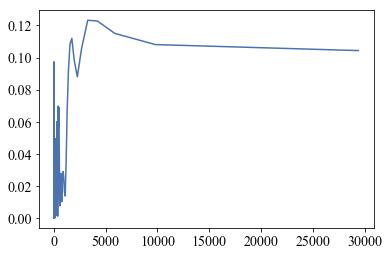

In [349]:
lcc=pd.concat(gg)
freq,power = LombScargle(lcc['mjdobs'],lcc['mag'],lcc['emag']).autopower(maximum_frequency=20.)
plt.plot(1./freq, power)
# plt.xlim(0.9,1.1)
# plt.axvline(0.9972,ymin=0.8)

In [357]:
def get_lightcurves():

    lcs = pd.DataFrame(sqlutilpy.get('''
                                select sourceid, 
                                unnest(mjdobs) as mjdobs,
                                unnest(mag) as mag,
                                unnest(emag) as emag,
                                unnest(filterid) as filterid,
                                unnest(chi) as chi,
                                unnest(ast_res_chisq) as ast_res_chisq,
                                unnest(ambiguous_match) as ambiguous_match  
                                from leigh_smith.virac2_ts_tmolnar_train_zyjhk''',
                     **config.wsdb_kwargs))
    
    return lcs


In [388]:
var_dataset_full[(var_dataset_full['var_class']=='RRab')&(np.abs(var_dataset_full['lsq_period']-0.5)<1e-4)][['sourceid','lsq_period']]

,sourceid,lsq_period
17759,8635334019897,0.499965
35063,8737741027014,0.500069
107013,9069493002924,0.500021
135250,9159620009844,0.499948
169933,9241631003190,0.500033
194516,9294771004173,0.499983
209225,9323448019925,0.499933
225618,9356200010496,0.499981
252986,9409414029914,0.500033
263826,9429906008527,0.500055


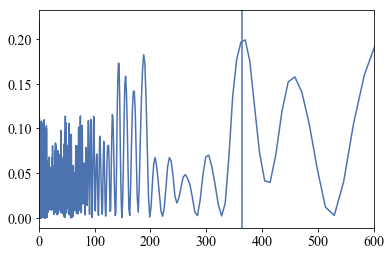

In [361]:
lcc=get_lightcurves()
freq,power = LombScargle(lcc['mjdobs'],lcc['mag'],lcc['emag']).autopower(maximum_frequency=20.)
plt.plot(1./freq, power)
plt.xlim(0.,600.)
# plt.axvline(0.9999,ymin=0.8)
plt.axvline(365.)

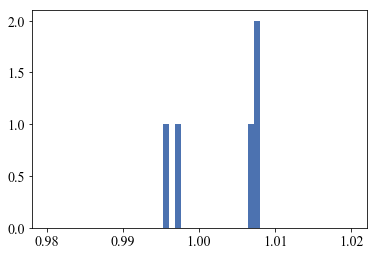

In [332]:
plt.hist(tt['lsq_period'][:50],range=[0.98,1.02],bins=50);

In [511]:
lcl = lightcurve_loader('/data/jls/virac/')

In [516]:
lpp=lcl.get_lcdata_per_file(2318830,512,np.array([9274333014999]))

<KeysViewHDF5 ['ambiguous_match', 'ast_res_chisq', 'catindexid', 'catindexidcovered', 'chi', 'cnf_ctr', 'dec', 'detid', 'diff_fit_ap', 'edec', 'eimag', 'emag', 'era', 'ext', 'hfad_emag', 'hfad_mag', 'hfad_refcount', 'imag', 'mag', 'objtype', 'ra', 'sky', 'ucal_mag', 'ucal_min_rcnt', 'x', 'y']>


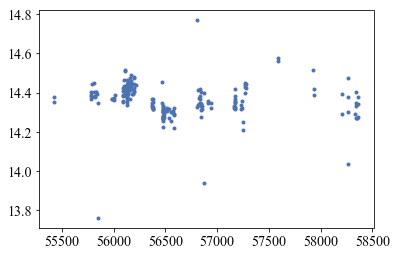

In [522]:
fltr = (lpp['filterid']==5)
plt.plot(lpp['mjdobs'][fltr],lpp['hfad_mag'][fltr],'.')
# plt.ylim(-1.2,-0.5)

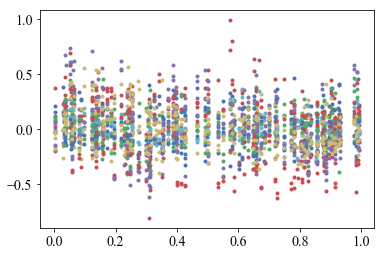

In [334]:
for ggg in gg:
    if ggg is not None:
        plt.plot(ggg['mjdobs']%0.995,ggg['mag']-np.nanmean(ggg['mag']),'.')

In [614]:
tt[['sourceid','lsq_period']][(tt['class']=='RRab')]

,sourceid,lsq_period
200,9270237023277,0.998673
272,9270237030067,0.996709
290,9270237031672,0.995292
314,9270237034306,0.997988
452,9270237048756,0.997927
1094,9274333014999,0.998944
1113,9274333016771,0.684904
1129,9274333017996,0.997927
1184,9274333022359,0.999284


In [815]:
var_dataset[['sourceid','cat_period','lsq_period']][(var_dataset['var_class']=='LPV')].sort_values(by='cat_period')

,sourceid,cat_period,lsq_period
424644,10453856029869,0.000000,0.682371
225040,9356246006016,0.000000,231.905922
222864,9352152040468,0.000000,0.502711
231414,9368532009834,0.000000,0.684727
218496,9343960025797,0.000000,1394.576127
391405,9909300002365,0.000000,0.332415
214687,9335768010349,0.000000,0.053195
212952,9331673074713,0.000000,0.238458
298724,9524107006649,0.000000,0.059991
229316,9364439066065,0.000000,0.341649


In [9]:
from fine_classif.feat_extract.extract_feats import source_feat_extract

In [626]:
lc=get_lightcurve(9270237023277)
clean = (lc['filterid']==5)&(lc['ambiguous_match']==0)&(lc['ast_res_chisq']<13.)&(lc['chi']<5.)
lc = sigclipper(lc[clean])
ss=source_feat_extract([0.,0.,lc],config,ls_kwargs={'minimum_frequency':0.00066667,'maximum_frequency':20.},
                   method_kwargs={'irreg':True});
print(ss['lsq_period'])

0.999344794611576


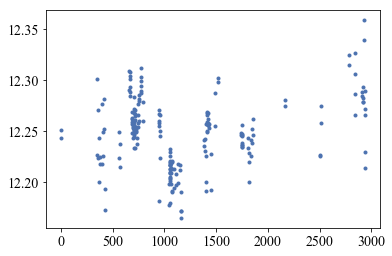

In [628]:
plt.plot(lc['mjdobs']-np.min(lc['mjdobs']),lc['mag'],'.')


In [707]:
tt[['sourceid','lsq_period']][(tt['class']=='RRab')&(tt['lsq_period']>0.)&(tt['lsq_period']<1.005)&(tt['log10_fap']<-10)]

,sourceid,lsq_period
843,9274332038425,0.332429
1094,9274333014999,0.998944
1113,9274333016771,0.684872


In [693]:
tt[['sourceid','lsq_period']][(tt['class']!='CONST')&(tt['lsq_period']>0.995)&(tt['lsq_period']<1.005)&(tt['log10_fap']<-10)]

,sourceid,lsq_period
66,9270237010535,1.001735
273,9270237030131,0.996702
307,9270237033143,1.004970
507,9274332004257,0.995359
626,9274332019640,0.998198
648,9274332021325,0.996439
683,9274332024074,0.998401
697,9274332025679,0.995966
924,9274332046207,0.998062
1037,9274333004640,0.998022


In [775]:
var_dataset[(var_dataset['var_class']=='RRab')&(np.abs(var_dataset['cat_period']/period_fix(var_dataset)-1)>0.2)][['sourceid','cat_period','lsq_period']][-8:]

,sourceid,cat_period,lsq_period
417647,10101693105141,0.409037,0.052144
419741,10134468015823,0.599906,0.086101
419805,10134483014345,0.437705,0.050276
421121,10159070025442,0.646749,0.422619
421745,10183633014047,0.622555,1.650015
422293,10208208028732,0.481551,21.547346
422795,10257313021189,0.498154,0.996591
422847,10261409009414,0.516792,0.681344


In [96]:
var_dataset[(var_dataset['var_class']=='RRab')&
            (var_dataset['log10_fap_ls']<-10)&
            (np.abs(var_dataset['lsq_period']-1.)<1e-2)][['sourceid','cat_period','lsq_period']][-15:]

,sourceid,cat_period,lsq_period
340975,9704421005679,0.502867,1.005734
343385,9712640000161,0.499982,0.999361
350093,9741298017726,0.503727,1.007430
362805,9790447025514,0.497883,0.994374
366145,9806795003028,0.501662,1.003281
378164,9851872007074,0.497116,0.994215
386065,9884649001844,0.497659,0.995340
388462,9896922001922,0.503589,1.007159
396891,9937907022210,0.503141,1.006259
407071,10003400005379,0.499825,0.999689


In [298]:
%%timeit -n 1 -r 10
ss=source_feat_extract([0.,0.,lcO],config,ls_kwargs={'minimum_frequency':0.00066667,'maximum_frequency':20.},
                   method_kwargs={'irreg':True});

964 ms ± 83.1 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [300]:
lcO.dtypes

sourceid             int64
mjdobs             float64
mag                float64
emag               float64
filterid             int16
chi                float32
ast_res_chisq      float32
ambiguous_match       bool
HJD                float64
dtype: object

2585.893362490002
0.9949096020982515
-11.502720408827145
[9.94056435e-01 8.63296911e-03 1.25774473e-02 9.73483274e-01
 1.00867421e+00 9.33729121e-01 4.98726054e+00 1.60023319e+01
 1.01532568e+00 7.33267822e+00 5.98730178e+00 6.32992999e+00
 1.45952360e+01 7.25564488e+00 1.00511644e+00 2.00067180e+00
 1.79147851e+01 1.69120369e+01 3.08501660e+00 7.93688472e-03
 1.95983039e+01 1.01261869e+00 1.93377036e+00 1.97623151e+00
 1.85572710e+01 1.99680467e+00 1.92740059e+01 1.89821145e+01
 1.08222712e+00 6.00795229e+00 6.40240011e+00 9.83847197e-01
 2.93651859e+00 1.48047574e+01 2.00515768e+00 1.01068512e+00
 1.49995837e+01 8.41539881e+00 1.52128949e+01 2.08226836e+00
 1.93647735e+00 1.12779298e+01 9.02250639e-01 3.98451231e+00
 6.90376255e-02 1.85957877e+01 1.35109686e+01 1.90499887e+00
 2.01536692e+00 1.13912369e+01]
[]


[]

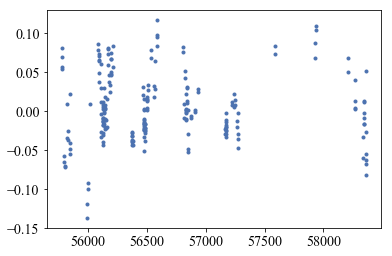

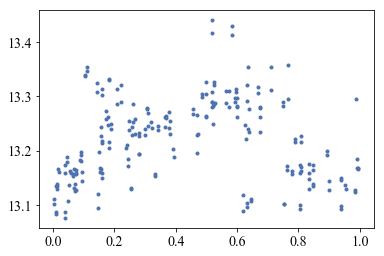

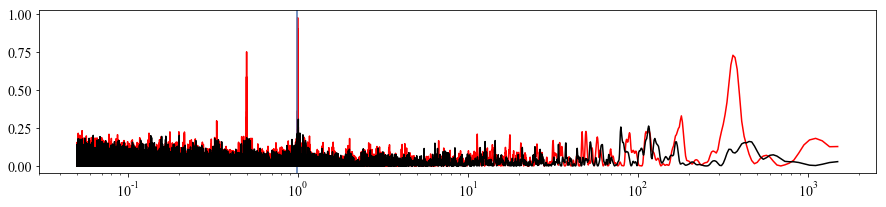

In [488]:
lcO=get_lightcurve(9274333037996)
lcO['mag'] = lcO['mag'].astype(np.float64)
lcO['emag'] = lcO['emag'].astype(np.float64)
lc = lcO.copy()
clean = (lc['filterid']==5)&(lc['ambiguous_match']==0)&(lc['ast_res_chisq']<11.829)&~((lc['chi']>5.)&(lc['mag']<13.2))&(lc['emag']>0.)
lc = sigclipper(lc[clean],float(config['sig_thresh']))

plt.figure()
pl=np.polyfit(lc['mjdobs'],lc['mag'],3,w=1./lc['emag'])
plt.plot(lc['mjdobs'],lc['mag']-np.poly1d(pl)(lc['mjdobs']),'.')
print(np.max(lc['mjdobs'])-np.min(lc['mjdobs']))
# plt.plot(lc['mjdobs'],lc['mag']-np.poly1d(pl)(lc['mjdobs']),'.')
freq,power = LombScargle(lc['mjdobs'],lc['mag']-np.poly1d(pl)(lc['mjdobs']),lc['emag']).autopower(maximum_frequency=20.,
                                                                                                  minimum_frequency=0.00066667,
                                                                                                  nyquist_factor=10)
freq,wpower = LombScargle(lc['mjdobs'],np.ones_like(lc['mag']),lc['emag'],center_data=False, fit_mean=False).autopower(
    maximum_frequency=20.,minimum_frequency=0.00066667,
                                                                                                  nyquist_factor=10)
ss=source_feat_extract([0.,0.,lcO],config,ls_kwargs={'minimum_frequency':0.00066667,'maximum_frequency':20.},
                   method_kwargs={'irreg':True});
print(ss['lsq_period'])
print(ss['log10_fap_ls'])
from scipy.signal import find_peaks
fp = find_peaks(power)[0]
bf=1./freq[fp][np.argsort(power[fp])[::-1][:50]]
bfp=power[fp][np.argsort(power[fp])[::-1][:50]]
print(1./bf)

from fine_classif.feat_extract.lc_utils import is_window_function_peak, is_window_function_peak_v2
# print(is_window_function_peak(lc['mjdobs'],lc['mag']-np.poly1d(pl)(lc['mjdobs']),lc['emag'],
#                               bf,bfp))
# print(is_window_function_peak_v2(lc['mjdobs'],lc['mag']-np.poly1d(pl)(lc['mjdobs']),lc['emag'],
#                               bf,bfp))

bfL = bf[bf>365.]
print(bfL)
plt.figure()
plt.plot(lc['mjdobs']%ss['lsq_period'],lc['mag'],'.')
plt.figure(figsize=[15.,3.])

plt.plot(1./freq, wpower, color='r')
for ii in range(len(bfL)):
#     print(is_window_function_peak_v2(lc['mjdobs'],lc['mag']-np.poly1d(pl)(lc['mjdobs']),lc['emag'],
#                                   bf-bfL[ii],bfp))
#     print(is_window_function_peak_v2(lc['mjdobs'],lc['mag']-np.poly1d(pl)(lc['mjdobs']),lc['emag'],
#                                   bf+bfL[ii],bfp))
    plt.plot(1./(freq+1./bfL[ii]), wpower)
    plt.plot(1./(freq-1./bfL[ii]), wpower)

plt.axvline(ss['lsq_period'])
# plt.plot(1./(freq-1./2939.), wpower)
# plt.plot(1./(freq+1./2939.), wpower)

plt.plot(1./freq, power, color='k')

# plt.plot(1./(freq-1./365.), wpower)
# plt.xlim(-100.,4000.)

# plt.xlim(ss['lsq_period']*0.99,ss['lsq_period']*1.01)

# plt.xlim(0.992,1.008)
# plt.xlim(0.1,1500.)
# plt.xlim(0.1,2.)
plt.semilogx()


(0.0, 3000.0)

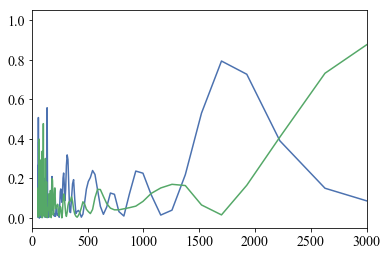

In [650]:
xx = np.random.uniform(0.,3000.,20)
yy = np.sin(2.*np.pi*xx/4000.)
pp = np.polyfit(xx,yy,3)
lss = LombScargle(xx, yy - np.poly1d(pp)(xx)).autopower()
plt.plot(1./lss[0],lss[1])
lss = LombScargle(xx, yy).autopower()
plt.plot(1./lss[0],lss[1])
plt.xlim(0.,3000.)

(0.0, 2.0)

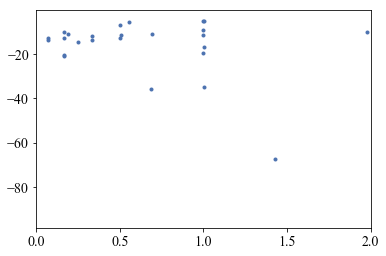

In [987]:
# plt.plot(1./tt['lsq_period'][tt['class']!='CONST'],tt['log10_fap'][tt['class']!='CONST'],'.')

plt.plot(tt_new['lsq_period'][tt_new['class']!='CONST'],tt_new['log10_fap'][tt_new['class']!='CONST'],'.')

plt.xlim(0.,2.)
# # plt.ylim(-50,0)

# plt.axvspan(0.9999-1e-3,0.9999+1e-3,alpha=0.3)
# plt.axvspan(0.9972-1e-3,0.9972+1e-3,alpha=0.3)

In [225]:
tt3 = pd.merge(tt, tt2, on='sourceid',how='outer')

[]

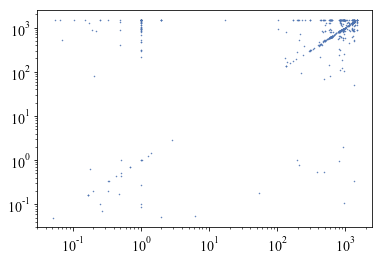

In [226]:
plt.plot(tt3['lsq_period_x'][(tt3['class_x']!='CONST')&(tt3['prob_x']>0.5)],
         tt3['lsq_period_y'][(tt3['class_x']!='CONST')&(tt3['prob_x']>0.5)],'.',ms=1)
plt.semilogy()
plt.semilogx()

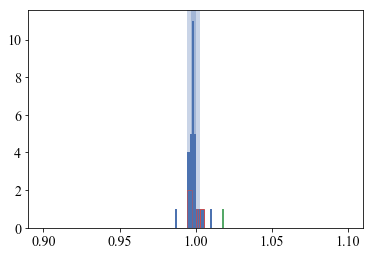

In [1008]:
plt.hist(tt['lsq_period'][(tt['prob']>0.5)&(tt['class']!='CONST')],bins=150,range=[0.9,1.1]);

plt.hist(tt2['lsq_period'][(tt2['prob']>0.5)&(tt2['class']!='CONST')],bins=150,range=[0.9,1.1]);

plt.hist(tt_new['lsq_period'][(tt_new['prob']>0.5)&(tt_new['class']!='CONST')],bins=150,range=[0.9,1.1],histtype='step');


# plt.semilogy()

plt.axvspan(0.9999-1./365.,0.9999+1./365.,alpha=0.3)
plt.axvspan(0.9972-1./365.,0.9972+1./365.,alpha=0.3)
# plt.axvline(0.9999)

# plt.axvline(0.9972)
# plt.axvline(0.9972)

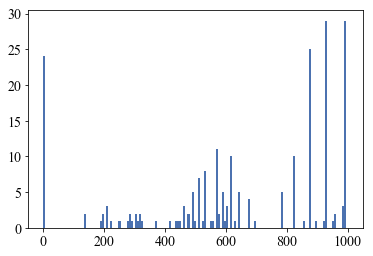

In [998]:
plt.hist(tt_new['lsq_period'][(tt_new['prob']>0.5)&(tt_new['class']!='CONST')],bins=150,range=[0.,1000.]);

# plt.hist(tt['lsq_period'][(tt['prob']>0.5)&(tt['class']!='CONST')],bins=150,range=[0.99,1.01]);

# plt.semilogy()

# plt.axvspan(0.9999-1./365,0.9999+1./365,alpha=0.3)
# plt.axvspan(0.9972-1./365,0.9972+1./365,alpha=0.3)
# plt.axvline(0.9999)

# plt.axvline(0.9972)
# plt.axvline(0.9972)

In [870]:
with open('/local/scratch_2/jls/virac_classifier/variable/edr3_SJ_noalias/variable_features_total_test.pkl', 'rb') as ff:
    fp = pickle.load(ff)

In [912]:
with open('/local/scratch_2/jls/virac_classifier/variable/edr3/variable_features_total_test.pkl', 'rb') as ff:
    fp2 = pickle.load(ff)

In [913]:
len(fp2)

2000

In [921]:
1-np.count_nonzero((fp['var_class']=='RRcd')&(np.abs(fp['cat_period']/period_fix(fp)-1)<0.1)&(fp['log10_fap_ls']<-10))/\
np.count_nonzero((fp['var_class']=='RRcd')&(fp['log10_fap_ls']<-10)),\
np.count_nonzero((fp['var_class']=='RRcd')&(np.abs(fp['cat_period']/period_fix(fp)-1)>0.1)&(fp['log10_fap_ls']<-10))

ZeroDivisionError: division by zero

In [919]:
1-np.count_nonzero((fp2['var_class']=='T2CEP')&(np.abs(fp2['cat_period']/period_fix(fp2)-1)<0.1)&(fp2['log10_fap_ls']<-10))/\
    np.count_nonzero((fp2['var_class']=='T2CEP')&(fp2['log10_fap_ls']<-10)),\
np.count_nonzero((fp2['var_class']=='T2CEP')&(np.abs(fp2['cat_period']/period_fix(fp2)-1)>0.1)&(fp2['log10_fap_ls']<-10))

(0.0, 0)

In [168]:
tt_new = pd.read_csv('/local/scratch_2/jls/virac_classifier/results/edr3_SJ_noalias/results_7380776_test.csv.tar.gz')


In [169]:
len(tt_new)

1955

In [170]:
np.count_nonzero(tt_new['class']!='CONST'), np.count_nonzero(tt['class']!='CONST'), 

(393, 396)

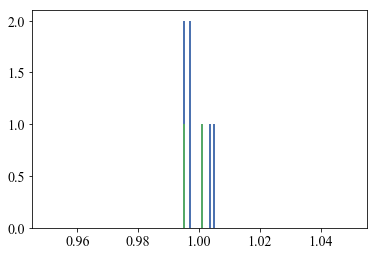

In [177]:
plt.hist(tt['lsq_period'][tt['class']!='CONST'],range=[0.95,1.05],bins=150)
plt.hist(tt_new['lsq_period'][tt_new['class']!='CONST'],range=[0.95,1.05],bins=150);

In [129]:
tt[['lsq_period','sourceid']][tt['class']=='RRab']

,lsq_period,sourceid
843,0.332429,9274332038425
1113,0.684872,9274333016771
1191,0.499459,9274333023265


In [207]:
tt = pd.read_csv('/local/scratch_2/jls/virac_classifier/results/edr3_SJ_noalias/results_7380776_test.csv.tar.gz')
ttO = pd.read_csv('../results_7380776_test.csv.tar.gz')

In [244]:
tt['sourceid'][(tt['class']!='CONST')&(tt['prob_nofap']>0.9)], ttO['sourceid'][(ttO['class']=='RRab')&(ttO['prob']>0.9)]

(2       9270237000072
 19      9270237001142
 24      9270237001432
 40      9270237002109
 47      9270237002402
 60      9270237003048
 62      9270237003098
 72      9270237003666
 74      9270237003726
 88      9270237004713
             ...      
 5764    9278429047365
 5769    9278429047518
 5789    9278429048581
 5816    9278429049687
 5817    9278429049741
 5844    9278429050336
 5857    9278429050708
 5863    9278429050921
 5869    9278429051157
 5922    9278429053460
 Name: sourceid, Length: 840, dtype: int64,
 Series([], Name: sourceid, dtype: int64))

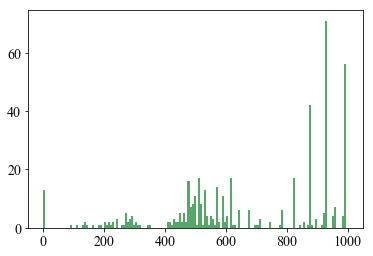

In [249]:
plt.hist(tt['lsq_period'][(tt['class']!='CONST')&(tt['prob_nofap']>0.9)],bins=150,range=[0.,1000.]);

plt.hist(tt['lsq_period'][(tt['class']!='CONST')&(tt['prob']>0.9)],bins=150,range=[0.,1000.]);


# plt.hist(ttO['lsq_period'][(ttO['class']=='RRab')&(ttO['prob']>0.9)],bins=150,range=[0.,1.]);

# plt.axvspan(0.9999-1./365.,0.9999+1./365.,alpha=0.2)
# plt.axvspan(0.9972-1./365.,0.9972+1./365.,alpha=0.2)


plt.axvspan(0.9999-0.005,0.9999+0.005,alpha=0.2)
plt.axvspan(0.9972-0.005,0.9972+0.005,alpha=0.2)

plt.axvspan(0.9999/2.-0.005,0.9999/2.+0.005,alpha=0.2)
plt.axvspan(0.9972/2.-0.005,0.9972/2.+0.005,alpha=0.2)


In [232]:
def period_fix(var_in,tol=1.):

    period_out = var_in['lsq_period'].values.copy()

    period_out[((var_in['var_class']=='EA/EB')|(var_in['var_class']=='Ell'))&
                (var_in['amp_0']>tol*var_in['amp_1'])]*=2.
    
    ss=np.argmax([var_in['amp_0'].values,
                  var_in['amp_1'].values,
                  var_in['amp_2'].values,
                  var_in['amp_3'].values],axis=0)
    fltr = ~((var_in['var_class']=='EA/EB')|(var_in['var_class']=='Ell'))
    period_out[fltr]/=(1.+ss)[fltr]
    
    period_out[var_in['var_class']=='EW']*=2
    
    return period_out
    

with open('/local/scratch_2/jls/virac_classifier/variable/edr3/variable_features_batch5.pkl', 'rb') as f:
    varTT = pickle.load(f)

for cc in ['RRab','EA/EB','EW','CEP','T2CEP','Ell','RRc','OSARG']:
    fltr = (varTT['log10_fap_ls']<-10)&(varTT['var_class']==cc)
    print(cc,np.count_nonzero(fltr),100.*np.count_nonzero(np.abs(1./(period_fix(varTT)[fltr]/varTT['cat_period'][fltr])-1)>0.1)/np.count_nonzero(fltr))

RRab 2356 0.7640067911714771
EA/EB 8008 2.4975024975024973
EW 2981 1.1405568601140557
CEP 8 0.0
T2CEP 56 1.7857142857142858
Ell 1112 1.3489208633093526
RRc 593 4.0472175379426645
OSARG 4 75.0


In [400]:
import pickle
import pandas

sss=0.
sst=0.
for b in np.arange(0,9):
    with open('/local/scratch_2/jls/virac_classifier/variable/edr3_SJ_noalias/variable_features_batch%i.pkl'%b, 'rb') as f:
        var = pickle.load(f)

    import numpy as np
    for cc in ['RRab']:#,'EA/EB','EW','CEP','T2CEP','Ell','RRc','OSARG']:
        fltr = (var['log10_fap_ls']<-10)&(var['cat_period']>0.)#&(var['var_class']==cc)
        print(cc,np.count_nonzero(fltr),100.*np.count_nonzero(np.abs(1./(period_fix(var)[fltr]/var['cat_period'][fltr])-1)>0.1)/np.count_nonzero(fltr))
        VV = var[['sourceid','cat_period','lsq_period']][fltr][np.abs(1./(period_fix(var)[fltr]/var['cat_period'][fltr])-1)>0.1]
        sss+=np.count_nonzero(np.abs(1./(period_fix(var)[fltr]/var['cat_period'][fltr])-1)>0.1)
        sst+=np.count_nonzero(fltr)
print(sss/sst*100.)

RRab 21788 1.2346245639801725
RRab 23559 2.011969947790653
RRab 25573 2.6473233488444845
RRab 21737 3.9793899802180612
RRab 18906 3.7924468422722946
RRab 15056 1.9128586609989373
RRab 16817 1.6055182256050424
RRab 17200 1.6453488372093024
RRab 17594 1.7619643060134136
2.330135218537844


In [183]:
with open('/local/scratch_2/jls/virac_classifier/variable/edr3_SJ_noalias/variable_features_mira.pkl', 'rb') as f:
    varTT = pickle.load(f)

for cc in ['MIRA']:
    fltr = (varTT['log10_fap_ls']<-10)&(varTT['var_class']==cc)
    print(cc,np.count_nonzero(fltr),100.*np.count_nonzero(np.abs(1./(period_fix(varTT)[fltr]/varTT['cat_period'][fltr])-1)>0.1)/np.count_nonzero(fltr))

MIRA 663 26.69683257918552


In [465]:
tt = pd.read_csv('/local/scratch_2/jls/virac_classifier/results/edr3_SJ_noalias/results_7380776_test.csv.tar.gz')


In [472]:
!head -n 6 /local/scratch_2/jls/virac_classifier/results/edr3_SJ_noalias/log_0_test.log

2021-07-05 19:38:31,614 Suppressing XGB & sklearn pickle warnings for variable classifier
2021-07-05 19:38:34,223 Healpix 7380776: started, generating input data from lightcurve files
2021-07-05 19:38:34,604 Healpix 7380776: Running binary classifier for 30711 lightcurves. Predicted finish time: 2021-07-05 20:39:59.924072
2021-07-05 19:38:34,776 Healpix 7380776: Suppressing sklearn pickle warnings for binary classifier
2021-07-05 19:38:45,095 Healpix 7380776: 6011/30711 variable candidates, predicted finish time 2021-07-05 20:38:51.695610
2021-07-05 22:27:33,031 Healpix 7380776: finished, run in 10138.765749454498s: Ell:1,LPV:887,T2CEP:0,EW:1,RRcd:0,EA/EB:84,RRab:3


In [478]:
tt[['sourceid','lsq_period']][(tt['class']!='CONST')&(tt['prob']>0.9)&(tt['lsq_period']<2.)]

,sourceid,lsq_period
825,9270237030510,1.426227
1756,9274332015433,0.255356
2123,9274332025727,1.993446
3221,9274333010001,1.426850
3347,9274333016771,0.684872
3865,9274333030775,0.510324
4080,9274333036099,1.993715
4161,9274333037996,0.994910
5083,9278429022527,0.689822
5204,9278429027672,0.986932


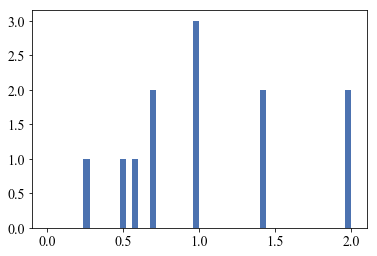

In [476]:
plt.hist(tt['lsq_period'][(tt['class']!='CONST')&(tt['prob']>0.9)],bins=50,range=[0,2]);

In [441]:
tt2 = pd.read_csv('/local/scratch_2/jls/virac_classifier/results/edr3_SJ_noalias_test/results_7380776_test.csv.tar.gz')
ttO = pd.read_csv('../results_7380776_test.csv.tar.gz')

In [471]:
np.count_nonzero(tt['class']!='CONST')

1264

In [464]:
pd.read_csv('/data/jls/variable_features_mira.csv').to_pickle(
    '/local/scratch_2/jls/virac_classifier/variable/edr3_SJ_noalias_updated/variable_features_mira.pkl')
pd.read_csv('/data/jls/variable_features_total.csv').to_pickle(
    '/local/scratch_2/jls/virac_classifier/variable/edr3_SJ_noalias_updated/variable_features_total.pkl')

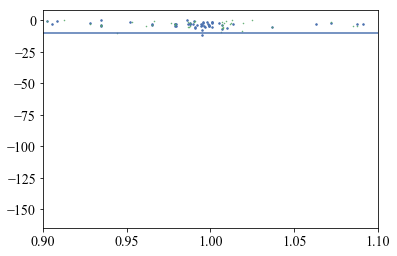

In [459]:
plt.plot(tt2['lsq_period'],tt2['log10_fap'],'.',ms=3)

plt.plot(ttO['lsq_period'],ttO['log10_fap'],'.',ms=1)

plt.xlim(0.9,1.1)
plt.axhline(-10.)

In [425]:
np.count_nonzero(tt2['class']=='RRab')

3

In [317]:
with open('/local/scratch_2/jls/virac_classifier/variable/edr3_SJ_noalias/variable_classifier_-10.pkl'%b, 'rb') as f:
    var10_c = pickle.load(f)
with open('/local/scratch_2/jls/virac_classifier/variable/edr3_SJ_noalias/variable_classifier_0.pkl'%b, 'rb') as f:
    var0_c = pickle.load(f)

In [364]:
len(ttO), len(tt)

(1923, 5956)

In [340]:
var0_c.predict(var0[:2].reset_index(drop=True))['prob']

0    0.400937
1    0.485835
Name: prob, dtype: float32

In [341]:
var10_c.predict(var0[:2].reset_index(drop=True))['prob']

0    0.999471
1    0.999754
Name: prob, dtype: float32

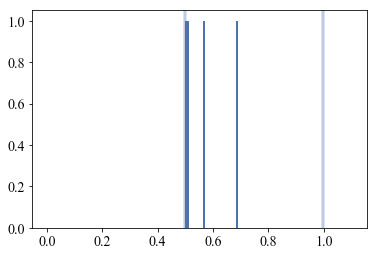

In [374]:
# plt.hist(ttO['lsq_period'][(ttO['class']=='RRab')&(ttO['prob']>0.9)],bins=150,range=[0.,1.]);


plt.hist(tt['lsq_period'][(tt['class']=='RRab')&(tt['prob_nofap']>0.5)],bins=150,range=[0.,1.1]);

# plt.hist(tt['lsq_period'][(tt['class']!='CONST')&(tt['prob']>0.9)],bins=150,range=[0.,1000.]);

# plt.axvspan(0.9999-1./365.,0.9999+1./365.,alpha=0.2)
# plt.axvspan(0.9972-1./365.,0.9972+1./365.,alpha=0.2)


plt.axvspan(0.9999-0.005,0.9999+0.005,alpha=0.2)
plt.axvspan(0.9972-0.005,0.9972+0.005,alpha=0.2)

plt.axvspan(0.9999/2.-0.005,0.9999/2.+0.005,alpha=0.2)
plt.axvspan(0.9972/2.-0.005,0.9972/2.+0.005,alpha=0.2)
